In [2]:
! pip install astroNN
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras import utils

from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup

     |████████████████████████████████| 9.3 MB 11.2 MB/s 
     |████████████████████████████████| 4.5 MB 41.9 MB/s 
     |████████████████████████████████| 832 kB 50.3 MB/s 
     |████████████████████████████████| 48 kB 5.3 MB/s 
     |████████████████████████████████| 4.0 MB 40.4 MB/s 
  Created wheel for astroNN: filename=astroNN-1.0.1-py3-none-any.whl size=9284595 sha256=bd2eaeee1a7d9eaeec4e6429853015eae393ff6b1fc99cdbe194fe95ecd54749
  Stored in directory: /root/.cache/pip/wheels/26/a4/7e/4cbf2a7f9cd51929da9d09345e8cd37c647b54825a1314dd2d
Successfully built astroNN
WARNING! APOGEE environment variable SDSS_LOCAL_SAS_MIRROR not set
WARNING! Gaia environment variable GAIA_TOOLS_DATA not set


In [3]:
images, labels = galaxy10.load_data()

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

features = ['Disk, Face-on, No Spiral', 'Smooth, Completely round', 'Smooth, in-between round', 'Smooth, Cigar shaped', 'Disk, Edge-on, Rounded Bulge', 'Disk, Edge-on, Boxy Bulge', 
            'Disk, Edge-on, No Bulge','Disk, Face-on, Tight Spiral', 'Disk, Face-on, Medium Spiral', 'Disk, Face-on, Loose Spiral']

x_train = x_train / 255.0
x_test = x_test / 255.0

Galaxy10.h5:  99%|█████████▉| 209M/210M [00:09<00:00, 33.4MB/s]

Downloaded Galaxy10 successfully to /root/.astroNN/datasets/Galaxy10.h5


Galaxy10.h5: 210MB [00:10, 20.3MB/s]                           


In [4]:
print(labels)

[2 2 4 ... 2 9 2]


In [5]:
x_train.shape, x_test.shape
# This prints ((17428, 69, 69, 3), (4357, 69, 69, 3))

((17428, 69, 69, 3), (4357, 69, 69, 3))

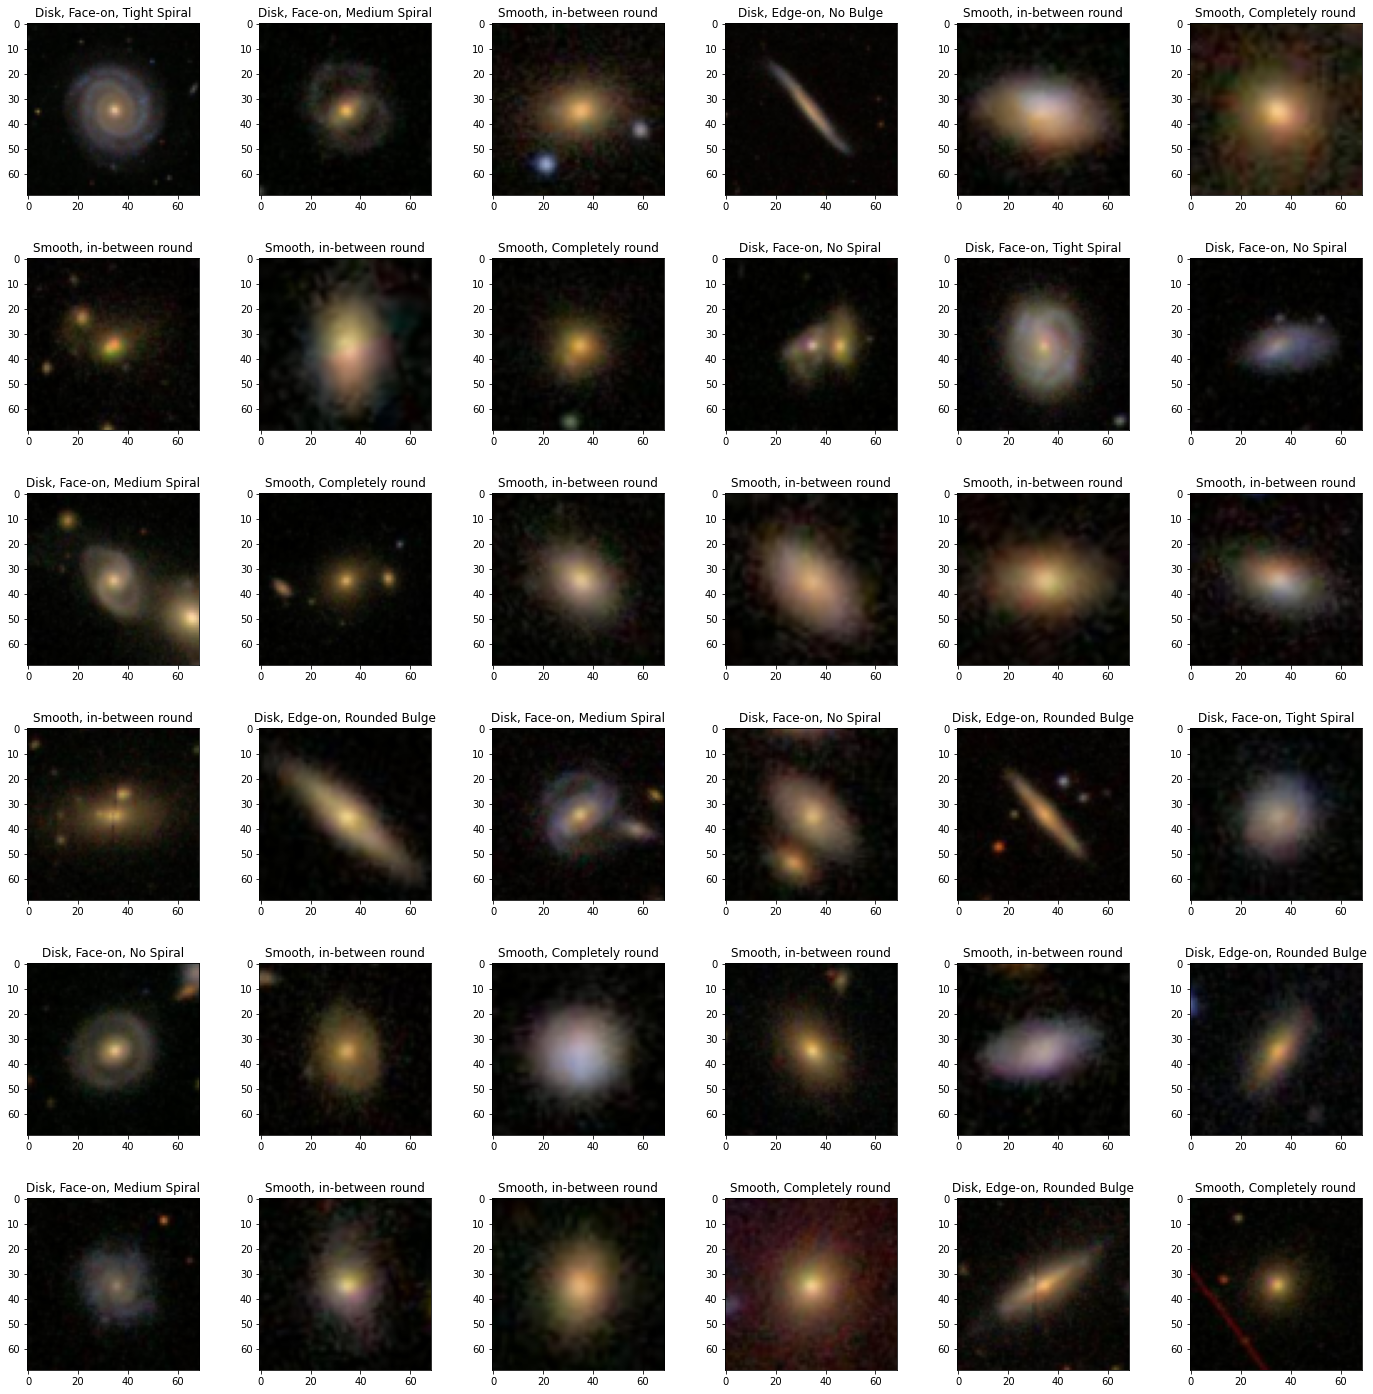

In [6]:
fig = plt.figure(figsize=(20,20)) 

for i in range(36):
    plt.subplot(6,6,i+1)    
    plt.imshow(x_train[i])
    plt.title(features[y_train[i]])
    fig.tight_layout(pad=3.0)
    
plt.show()

In [7]:
df = pd.DataFrame(data=labels)

counts = df.value_counts().sort_index()
print(counts)

0    3461
1    6997
2    6292
3     349
4    1534
5      17
6     589
7    1121
8     906
9     519
dtype: int64


#**VGG19 MODEL**

In [15]:
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from tensorflow.keras.applications import VGG19 #For Transfer Learning
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from tensorflow.keras.utils import to_categorical

In [16]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)


In [17]:
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((12199, 69, 69, 3), (12199,))
((5229, 69, 69, 3), (5229,))
((4357, 69, 69, 3), (4357,))


In [18]:
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [19]:
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((12199, 69, 69, 3), (12199, 10))
((5229, 69, 69, 3), (5229, 10))
((4357, 69, 69, 3), (4357, 10))


In [20]:
train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1)

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True, zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [21]:
lrr= ReduceLROnPlateau(monitor='val_accuracy', factor=.01, patience=3, min_lr=1e-5) 

In [22]:
base_model = VGG19(include_top = False, weights = 'imagenet', input_shape = (69,69,3), classes = y_train.shape[1])

80150528/80134624 [==============================] - 1s 0us/step


In [23]:
model= Sequential()
model.add(base_model) 
model.add(Flatten()) 

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 2, 2, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
Total params: 20,024,384
Trainable params: 20,024,384
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.add(Dense(1024,activation=('relu'),input_dim=512))
model.add(Dense(512,activation=('relu'))) 
model.add(Dense(256,activation=('relu'))) 
model.add(Dropout(.3))
model.add(Dense(128,activation=('relu')))
#model.add(Dropout(.2))
model.add(Dense(10,activation=('softmax'))) 

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 2, 2, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [27]:
batch_size= 100
epochs=50
learn_rate=.001
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [28]:
model.fit_generator(train_generator.flow(x_train, y_train, batch_size= batch_size),epochs = epochs, steps_per_epoch = len(x_train)//batch_size, validation_data = val_generator.flow(x_val, y_val, batch_size = batch_size), validation_steps =10, callbacks=[lrr], verbose = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/50
121/121 [==============================] - 67s 424ms/step - loss: 1.3832 - accuracy: 0.4705 - val_loss: 0.8757 - val_accuracy: 0.6720 - lr: 0.0010
Epoch 2/50
121/121 [==============================] - 48s 392ms/step - loss: 0.8713 - accuracy: 0.6835 - val_loss: 0.8507 - val_accuracy: 0.6780 - lr: 0.0010
Epoch 3/50
121/121 [==============================] - 48s 392ms/step - loss: 0.7512 - accuracy: 0.7247 - val_loss: 0.6775 - val_accuracy: 0.7570 - lr: 0.0010
Epoch 4/50
121/121 [==============================] - 48s 392ms/step - loss: 0.6712 - accuracy: 0.7591 - val_loss: 0.6145 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 5/50
121/121 [==============================] - 48s 391ms/step - loss: 0.6302 - accuracy: 0.7730 - val_loss: 0.6348 - val_accuracy: 0.7660 - lr: 0.0010
Epoch 6/50
121/121 [==============================] - 48s 392ms/step - loss: 0.5830 - accuracy: 0.7906 - val_loss: 0.6166 - val_accuracy: 0.7670 - lr: 0.0010
Epoch 7/50
121/121 [==============================] 

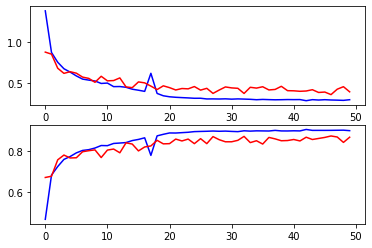

In [29]:
import matplotlib.pyplot as plt
f,ax=plt.subplots(2,1)
ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model.history.history['val_loss'],color='r',label='Validation Loss')
ax[1].plot(model.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model.history.history['val_accuracy'],color='r',label='Validation Accuracy')


In [31]:
y_pred=model.predict(x_test) 
classes_x=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_test,axis=1)

In [36]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model.predict(x_test),axis=1)



In [32]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    #Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    #Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
    np.set_printoptions(precision=2)


Confusion matrix, without normalization


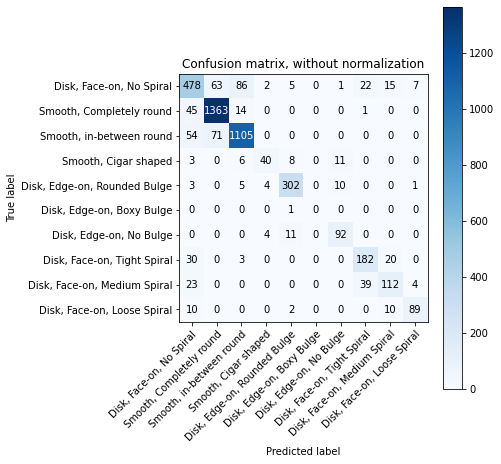

In [39]:
#Plotting the confusion matrix
confusion_mtx =confusion_matrix(y_test_arg, Y_pred)

#Defining the class labels
class_names=['Disk, Face-on, No Spiral', 'Smooth, Completely round', 'Smooth, in-between round', 'Smooth, Cigar shaped', 'Disk, Edge-on, Rounded Bulge', 'Disk, Edge-on, Boxy Bulge', 
            'Disk, Edge-on, No Bulge','Disk, Face-on, Tight Spiral', 'Disk, Face-on, Medium Spiral', 'Disk, Face-on, Loose Spiral']

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_test_arg, Y_pred, classes = class_names, title='Confusion matrix, without normalization')

Normalized confusion matrix


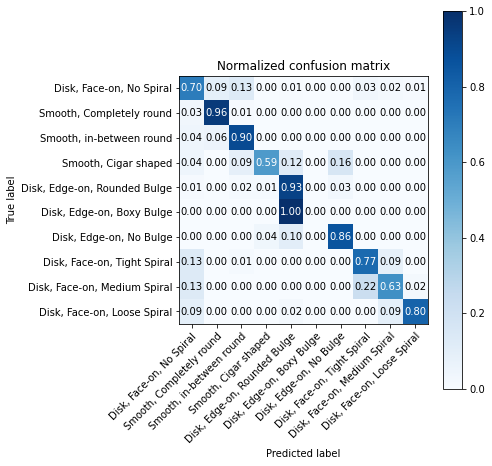

In [41]:
#Plotting normalized confusion matrix
plot_confusion_matrix(y_test_arg, Y_pred, classes = class_names, normalize = True, title = 'Normalized confusion matrix')